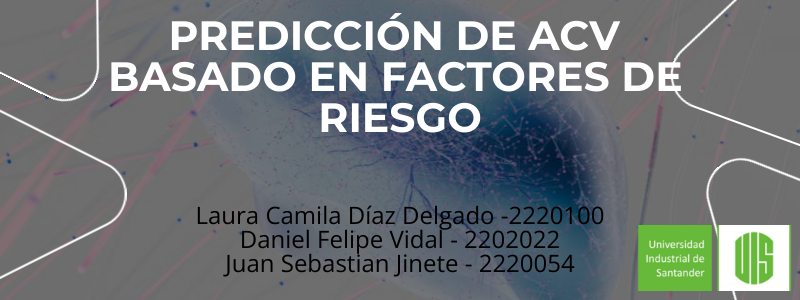

## PREDICCIÓN DE ACV BASADO EN FACTORES DE RIESGO


# 1. MOTIVACIÓN Y DESCRIPCIÓN DEL PROBLEMA
La motivación para desarrollar un proyecto de predicción de factores de riesgo de accidentes cerebrovasculares (ACV) se fundamenta en la urgente necesidad de abordar una de las principales causas de discapacidad y muerte en el país. En Colombia, los ACV no solo representan una carga significativa para el sistema de salud, sino también para las familias y comunidades afectadas, dejando a muchos individuos con consecuencias devastadoras a largo plazo.

Según la Organización Mundial de la Salud (OMS), las enfermedades cardiovasculares son la principal causa de muerte a nivel global, y los ACV constituyen una porción considerable de estas enfermedades. Aunque las cifras específicas para Colombia varían, estudios regionales sugieren que la prevalencia de factores de riesgo como la hipertensión arterial, la diabetes, el tabaquismo, y la obesidad está en aumento, lo que incrementa significativamente el riesgo de sufrir un ACV en la población.

La adopción de un enfoque preventivo a través de la predicción de riesgos basada en datos y algoritmos de aprendizaje automático y profundo puede transformar el panorama de la salud pública en Colombia. Este proyecto no solo tiene el potencial de salvar vidas mediante la identificación temprana de individuos en riesgo, sino que también puede contribuir a la reducción de la carga económica asociada con el tratamiento y la rehabilitación de los sobrevivientes de ACV.

Implementar este proyecto significa dar un paso adelante en la personalización de la atención médica, permitiendo intervenciones tempranas y específicas que pueden prevenir la ocurrencia de un ACV. La tecnología y el análisis de datos se convierten, así, en herramientas poderosas en manos de los profesionales de la salud para combatir una de las amenazas más graves para la salud de los colombianos, ofreciendo esperanza y una nueva dirección en la prevención de enfermedades cardiovasculares. La inversión en salud preventiva y tecnología es una inversión en el futuro de Colombia, donde cada vida salvada del impacto de un ACV es un testimonio del poder de la innovación y el cuidado humano.

**Describir cómo y por quiénes puede ser usada la solución propuesta:**

La solución propuesta puede ser utilizada por profesionales de la salud, investigadores en el área de la medicina preventiva, y entidades gubernamentales de salud pública. Los profesionales de la salud pueden utilizar el modelo predictivo para identificar pacientes con alto riesgo de ACV y tomar medidas preventivas. Los investigadores pueden usar la solución para estudiar patrones y factores de riesgo asociados con ACV. Las entidades gubernamentales pueden implementar esta solución para diseñar campañas de prevención y políticas de salud pública más efectivas.

**Describir cómo actualmente el problema se resuelve:**

Actualmente, la predicción del riesgo de ACV se basa en la evaluación clínica de factores de riesgo individuales por parte de los médicos. Los métodos tradicionales incluyen el uso de calculadoras de riesgo basadas en puntajes clínicos y la evaluación subjetiva de los factores de riesgo. Sin embargo, estos métodos pueden no capturar la complejidad de las interacciones entre múltiples factores de riesgo y pueden no ser tan precisos como los modelos basados en IA.

**Explicar su potencial aplicación en el contexto local:**

La solución tiene un gran potencial en el contexto local, especialmente en regiones con altos índices de factores de riesgo como hipertensión, diabetes y obesidad. En Colombia, donde los ACV representan una carga significativa para el sistema de salud, la implementación de esta solución puede ayudar a reducir la incidencia de ACV y mejorar la calidad de vida de los pacientes a través de intervenciones preventivas personalizadas. Además, puede ayudar a optimizar los recursos de salud al identificar de manera proactiva a los individuos en mayor riesgo.

# LIBRERIAS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 2. DATOS UTILIZADOS Y PROCESAMIENTO BÁSICO

In [3]:
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/Project_IA/Strokesdataset_modified.csv')

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


INSPECCIÓN DEL DATASET


*   validación y eliminación de datos nulos
*   convercion de datos tipo "object" a tipo "int"



In [4]:
# Verificar valores nulos
print(df.isnull().sum())

# Eliminar o imputar valores nulos
df = df.dropna()  # Aquí simplemente eliminamos filas con valores nulos, puedes optar por imputarlos si lo prefieres

# Convertir variables categóricas a numéricas
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1, 'Other': 2})
df['ever_married'] = df['ever_married'].map({'No': 0, 'Yes': 1})
df['work_type'] = pd.Categorical(df['work_type']).codes
df['Residence_type'] = df['Residence_type'].map({'Urban': 0, 'Rural': 1})
df['smoking_status'] = pd.Categorical(df['smoking_status']).codes


id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64


<ipython-input-4-f6e97b7a07b6>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gender'] = df['gender'].map({'Male': 0, 'Female': 1, 'Other': 2})
<ipython-input-4-f6e97b7a07b6>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ever_married'] = df['ever_married'].map({'No': 0, 'Yes': 1})
<ipython-input-4-f6e97b7a07b6>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat



*   Separamos las características (features) y la etiqueta (label).
*   La estandarización colocamos los datos en una escala común, con una media de 0 y una desviación estándar de 1.
*   Preparamos el conjunto de datos para entrenamiento.





In [5]:
# Separar características y etiqueta
X = df.drop(columns=['stroke'])
y = df['stroke']

# Estandarizar los datos
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Se define un modelo **DecisionTreeClassifier** con una profundidad máxima de 6.
Se entrena este modelo con los datos de entrenamiento.
Se obtienen las importancias de las características, que indican qué tan relevantes son las características individuales en la predicción del modelo.

In [6]:
est = DecisionTreeClassifier(max_depth=6)
est.fit(X_train,y_train)
est.feature_importances_

array([0.39914145, 0.        , 0.21782571, 0.02663962, 0.        ,
       0.        , 0.        , 0.        , 0.11941121, 0.236982  ,
       0.        ])

MATRIZ DE CORRELACIÓN

In [7]:
#Matriz de correlacion
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm', axis=None)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,1.000000,-0.010395,0.003718,0.002866,0.012479,0.002221,0.009640,0.000954,0.023062,0.008931,0.002023,-0.004140
gender,-0.010395,1.000000,-0.041219,-0.036955,-0.097699,-0.025376,-0.011566,0.006532,-0.050801,-0.021827,0.012370,-0.003164
age,0.003718,-0.041219,1.000000,0.257564,0.247434,0.547287,0.016762,-0.003554,0.228294,0.106416,-0.152712,0.012450
hypertension,0.002866,-0.036955,0.257564,1.000000,0.117980,0.130813,0.017544,0.002859,0.154063,0.129291,-0.031781,0.000491
heart_disease,0.012479,-0.097699,0.247434,0.117980,1.000000,0.095246,0.032951,0.003118,0.137489,0.022754,-0.035337,0.003034
ever_married,0.002221,-0.025376,0.547287,0.130813,0.095246,1.000000,-0.068288,-0.005055,0.117359,0.143328,-0.055230,0.001106
work_type,0.009640,-0.011566,0.016762,0.017544,0.032951,-0.068288,1.000000,0.009709,0.009850,-0.067224,-0.030287,0.005052
Residence_type,0.000954,0.006532,-0.003554,0.002859,0.003118,-0.005055,0.009709,1.000000,0.002561,0.002852,-0.011928,-0.003292
avg_glucose_level,0.023062,-0.050801,0.228294,0.154063,0.137489,0.117359,0.009850,0.002561,1.000000,0.176897,-0.036799,0.011892
bmi,0.008931,-0.021827,0.106416,0.129291,0.022754,0.143328,-0.067224,0.002852,0.176897,1.000000,-0.036820,0.004547


En una matriz de correlación, cada celda muestra el coeficiente de correlación entre dos variables, variando de -1 a +1:

* +1 indica una correlación positiva perfecta (ambas variables aumentan juntas).
* -1 indica una correlación negativa perfecta (una variable aumenta mientras la otra disminuye).
* 0 indica que no hay una relación lineal aparente entre las variables.

**RandomForestClassifier**


*   Define y entrena un modelo de Random Forest con 100 árboles.
*   Utiliza el modelo para predecir las etiquetas de los datos de prueba.
*  Evalúa el rendimiento del modelo mostrando la matriz de confusión y un informe de clasificación con diversas métricas de rendimiento.



In [8]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Classifier:")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Classifier:
[[  59 1639]
 [ 124 3993]]
              precision    recall  f1-score   support

           0       0.32      0.03      0.06      1698
           1       0.71      0.97      0.82      4117

    accuracy                           0.70      5815
   macro avg       0.52      0.50      0.44      5815
weighted avg       0.60      0.70      0.60      5815



**KNeighborsClassifier**
* Define y entrena un modelo de K-Nearest Neighbors con 5 vecinos.
* Utiliza el modelo para predecir las etiquetas de los datos de prueba.
* Evalúa el rendimiento del modelo mostrando la matriz de confusión y un informe de clasificación con diversas métricas de rendimiento.

In [9]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("K-Nearest Neighbors Classifier:")
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

K-Nearest Neighbors Classifier:
[[ 287 1411]
 [ 611 3506]]
              precision    recall  f1-score   support

           0       0.32      0.17      0.22      1698
           1       0.71      0.85      0.78      4117

    accuracy                           0.65      5815
   macro avg       0.52      0.51      0.50      5815
weighted avg       0.60      0.65      0.61      5815



**Support Vector Machine**
* Define y entrena un modelo de Support Vector Machine con un kernel lineal.
* Utiliza el modelo para predecir las etiquetas de los datos de prueba.
* Evalúa el rendimiento del modelo mostrando la matriz de confusión y un informe de clasificación con diversas métricas de rendimiento.

In [10]:
svc = SVC(kernel='linear', random_state=42)
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
print("Support Vector Machine Classifier:")
print(confusion_matrix(y_test, y_pred_svc))
print(classification_report(y_test, y_pred_svc))


Support Vector Machine Classifier:
[[   0 1698]
 [   0 4117]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1698
           1       0.71      1.00      0.83      4117

    accuracy                           0.71      5815
   macro avg       0.35      0.50      0.41      5815
weighted avg       0.50      0.71      0.59      5815



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**LogisticRegression**
* Define y entrena un modelo de Support Vector Machine con un kernel lineal.
* Utiliza el modelo para predecir las etiquetas de los datos de prueba.
* Evalúa el rendimiento del modelo mostrando la matriz de confusión y un informe de clasificación con diversas métricas de rendimiento.

In [11]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Logistic Regression Classifier:")
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Classifier:
[[   0 1698]
 [   0 4117]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1698
           1       0.71      1.00      0.83      4117

    accuracy                           0.71      5815
   macro avg       0.35      0.50      0.41      5815
weighted avg       0.50      0.71      0.59      5815



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**XGBClassifier**
* Define y entrena un modelo de Regresión Logística.
* Utiliza el modelo para predecir las etiquetas de los datos de prueba.
* Evalúa el rendimiento del modelo mostrando la matriz de confusión y un informe de clasificación con diversas métricas de rendimiento.

In [12]:
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print("XGBoost Classifier:")
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

XGBoost Classifier:
[[  69 1629]
 [ 173 3944]]
              precision    recall  f1-score   support

           0       0.29      0.04      0.07      1698
           1       0.71      0.96      0.81      4117

    accuracy                           0.69      5815
   macro avg       0.50      0.50      0.44      5815
weighted avg       0.58      0.69      0.60      5815



**Neural Network Classifier**
* Define y compila una red neuronal con varias capas densas y Dropout.
* Entrena el modelo utilizando los datos de entrenamiento.
* Evalúa el rendimiento del modelo mostrando la matriz de confusión y un informe de clasificación con diversas métricas de rendimiento.

In [13]:
# Definir la arquitectura del modelo
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compilar el modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluar el modelo
y_pred_nn = model.predict(X_test)
y_pred_nn = (y_pred_nn > 0.5).astype(int)
print("Neural Network Classifier:")
print(confusion_matrix(y_test, y_pred_nn))
print(classification_report(y_test, y_pred_nn))

Epoch 1/50
582/582 [==============================] - 13s 11ms/step - loss: 0.6139 - accuracy: 0.7038 - val_loss: 0.6036 - val_accuracy: 0.7163
Epoch 2/50
582/582 [==============================] - 8s 13ms/step - loss: 0.6110 - accuracy: 0.7046 - val_loss: 0.5986 - val_accuracy: 0.7163
Epoch 3/50
582/582 [==============================] - 4s 6ms/step - loss: 0.6088 - accuracy: 0.7046 - val_loss: 0.5988 - val_accuracy: 0.7163
Epoch 4/50
582/582 [==============================] - 3s 6ms/step - loss: 0.6085 - accuracy: 0.7046 - val_loss: 0.5991 - val_accuracy: 0.7163
Epoch 5/50
582/582 [==============================] - 4s 8ms/step - loss: 0.6074 - accuracy: 0.7046 - val_loss: 0.5996 - val_accuracy: 0.7163
Epoch 6/50
582/582 [==============================] - 3s 5ms/step - loss: 0.6071 - accuracy: 0.7046 - val_loss: 0.5987 - val_accuracy: 0.7163
Epoch 7/50
582/582 [==============================] - 2s 3ms/step - loss: 0.6074 - accuracy: 0.7046 - val_loss: 0.5985 - val_accuracy: 0.7163
Epo

* Este código realiza un cross-validation de varios modelos de machine learning, muestrando la precisión promedio de cada modelo utilizando validación cruzada con 5 pliegues. Esto proporciona una evaluación más robusta del rendimiento de cada modelo, ya que utiliza múltiples divisiones de los datos para entrenamiento y prueba.

In [14]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Evaluar el modelo de Random Forest
scores_rf = cross_val_score(rf, X, y, cv=kf, scoring='accuracy')
print(f"Random Forest CV Accuracy: {scores_rf.mean()}")

# Evaluar el modelo de KNN
scores_knn = cross_val_score(knn, X, y, cv=kf, scoring='accuracy')
print(f"K-Nearest Neighbors CV Accuracy: {scores_knn.mean()}")

# Evaluar el modelo de SVM
scores_svc = cross_val_score(svc, X, y, cv=kf, scoring='accuracy')
print(f"Support Vector Machine CV Accuracy: {scores_svc.mean()}")

# Evaluar el modelo de Regresión Logística
scores_lr = cross_val_score(lr, X, y, cv=kf, scoring='accuracy')
print(f"Logistic Regression CV Accuracy: {scores_lr.mean()}")

# Evaluar el modelo de XGBoost
scores_xgb = cross_val_score(xgb, X, y, cv=kf, scoring='accuracy')
print(f"XGBoost CV Accuracy: {scores_xgb.mean()}")

Random Forest CV Accuracy: 0.6945167903489102
K-Nearest Neighbors CV Accuracy: 0.6478396055892602
Support Vector Machine CV Accuracy: 0.7071749839758805
Logistic Regression CV Accuracy: 0.7071749839758805
XGBoost CV Accuracy: 0.6898044066550305


* Esto muestra un gráfico de barras que compara la precisión de cada clasificador en el conjunto de prueba.

Gaussian Naive
Precisión: 0.7096996101811511
Tiempo de Ejecución: 0.04308128356933594 segundos

Decision Tree
Precisión: 0.709470304975923
Tiempo de Ejecución: 0.19253182411193848 segundos

Random Forest
Precisión: 0.709470304975923
Tiempo de Ejecución: 8.94907832145691 segundos

Rbf SVC
Precisión: 0.7096996101811511
Tiempo de Ejecución: 60.78918766975403 segundos



<ipython-input-16-49b1e1c489d7>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=names, y=scoresSC, palette="viridis")  # Cambiar el nombre del color aquí


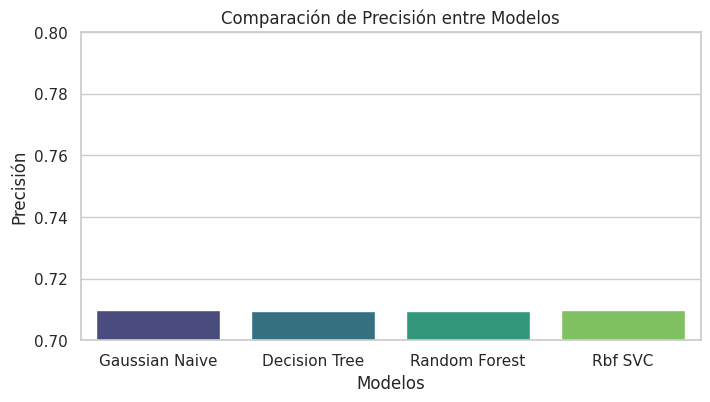

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

names = ["Gaussian Naive", "Decision Tree", "Random Forest", "Rbf SVC"]

classifiers = [
    GaussianNB(),
    DecisionTreeClassifier(max_depth=6),
    RandomForestClassifier(n_estimators=200, max_depth=10),
    SVC(kernel="rbf")
]

# Lista para almacenar los puntajes y tiempos de ejecución
scoresSC = []

# Iterar sobre los clasificadores
for name, est in zip(names, classifiers):
    start = time.time()
    est.fit(X_train, y_train)
    end = time.time()
    timet = end - start
    score = est.score(X_test, y_test)
    scoresSC.append(score)
    print(name)
    print("Precisión: " + str(score))
    print("Tiempo de Ejecución: " + str(timet) + " segundos")
    print()

# Crear el gráfico de barras
plt.figure(figsize=(8, 4))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x=names, y=scoresSC, palette="viridis")  # Cambiar el nombre del color aquí

# Configuraciones adicionales
plt.title('Comparación de Precisión entre Modelos')
plt.xlabel('Modelos')
plt.ylabel('Precisión')
plt.ylim(0.7, 0.8)  # Ajustar el rango de valores y para el eje y

# Mostrar el gráfico
plt.show()